In [2]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing as ps
from difflib import SequenceMatcher
import csv
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
#Organizo el archivo .json para descargar todo
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
#Se descarga el nuevo set de datos
!kaggle datasets download -d georgesaavedra/covid19-dataset

 66% 6.00M/9.09M [00:00<00:00, 62.7MB/s]
100% 9.09M/9.09M [00:00<00:00, 77.8MB/s]


In [6]:
#Se descomprime
!unzip /content/covid19-dataset.zip

Archive:  /content/covid19-dataset.zip
  inflating: owid-covid-data.csv     


In [7]:
d = pd.read_csv("owid-covid-data.csv")
d

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166322,ZWE,Africa,Zimbabwe,2022-03-02,237503.0,632.0,416.286,5396.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166323,ZWE,Africa,Zimbabwe,2022-03-03,237503.0,0.0,362.286,5396.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166324,ZWE,Africa,Zimbabwe,2022-03-04,238739.0,1236.0,467.429,5397.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


Valores y distribucion de la variable objetivo

In [8]:
#Numero de datos nulos en la variable objetivo (new_cases)
numero_de_nulos = d['new_cases'].isnull().sum()
print(numero_de_nulos)

3193


<ipython-input-9-e118c07939c2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['new_cases']);


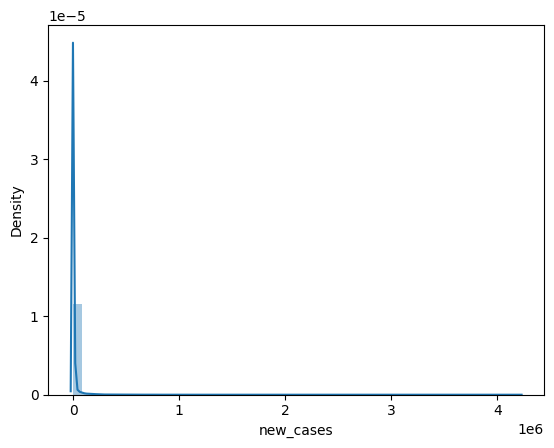

In [9]:
#Distribucion variable objetivo
sns.distplot(d['new_cases']);

## Valores faltantes

In [10]:
k = d.isna().sum()
k[k!=0]

continent                                    9956
total_cases                                  3033
new_cases                                    3193
new_cases_smoothed                           5176
total_deaths                                20875
                                            ...  
human_development_index                     30073
excess_mortality_cumulative_absolute       160630
excess_mortality_cumulative                160630
excess_mortality                           160630
excess_mortality_cumulative_per_million    160630
Length: 64, dtype: int64

# Limpieza de datos

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from progressbar import progressbar as pbar
#from local.lib import mlutils
%matplotlib inline
d['Id'] = range(len(d))
d.set_index('Id', inplace=True)
d.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
Id,,,,,,,,,,,,,,,,,,,,,
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [12]:
print (d.shape)

(166326, 67)


## Acciones para la reparacion de datos faltantes

- Remover columnas con mas del 50% de los datos faltantes.
- Eliminar filas donde la columna objetivo (new_cases) tenga valores faltantes.
- Remover NaN de las columnas categoricas y reemplazarlas con la moda.
- Remover las columnas cuya correlacion con "new_cases" sea menor a 0.1.
- Rellenar con la media los valores faltantes en las columnas numericas.

### Remover columnas con mas del 50% de los datos faltantes.

In [13]:
k = d.isna().sum()
k[k!=0]

continent                                    9956
total_cases                                  3033
new_cases                                    3193
new_cases_smoothed                           5176
total_deaths                                20875
                                            ...  
human_development_index                     30073
excess_mortality_cumulative_absolute       160630
excess_mortality_cumulative                160630
excess_mortality                           160630
excess_mortality_cumulative_per_million    160630
Length: 64, dtype: int64

In [14]:
#Porcentaje de datos faltantes por columna
def faltap(data):
    total      = data.isnull().sum().sort_values(ascending=False)
    percent    = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    missing  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
    return missing

In [15]:
inf=faltap(d)
inf

,Total,Percent
weekly_icu_admissions_per_million,160893,96.733523
weekly_icu_admissions,160893,96.733523
excess_mortality_cumulative_per_million,160630,96.575400
excess_mortality,160630,96.575400
excess_mortality_cumulative,160630,96.575400
...,...,...
total_cases,3033,1.823527
population,1075,0.646321
date,0,0.000000
location,0,0.000000


In [16]:
#Columnas con un porcentaje de datos faltantes mayor al 50%
mayores_a_50 = len(inf[inf["Percent"] > 50])
mayores_a_50

30

In [17]:
#Eliminacion de columnas con un porcentaje mayor al 50% de datos faltantes
lista = inf[inf["Percent"]>50].index.tolist()
d.drop(lista, axis= 1, inplace= True)
print (d.shape)

(166326, 37)


### Eliminar filas donde la columna objetivo (new_cases) tenga valores faltantes.

In [18]:
#Numero de datos nulos en new_cases
numero_de_nulos = d['new_cases'].isnull().sum()
numero_de_nulos


3193

In [19]:
print(d.shape)

(166326, 37)


In [20]:
#Eliminar filas donde la columna 'new_cases' tiene valores nulos
d = d.dropna(subset=['new_cases'])
print(d.shape)

(163133, 37)


### Remover NaN de las columnas categoricas y reemplazarlas con la moda.

In [21]:
#Columnas categoricas
ccols1 = [i for i in d.columns if not i in d._get_numeric_data()]
print (ccols1)

['iso_code', 'continent', 'location', 'date', 'tests_units']


In [22]:
#cdata contiene las columnas categoricas
cdata=d.select_dtypes(exclude=["int","float"]).columns

In [23]:
#Se eliminan NAN de columnas string y se reemplaaza con la moda
dic = {}
for i in cdata:
    DatosDropNa = d[i].dropna(axis = 0)
    dic[i] = DatosDropNa.mode()[0]

d.fillna(dic, inplace= True)

<ipython-input-23-92dd51852b47>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.fillna(dic, inplace= True)


In [24]:
numero_de_nulos = d['location'].isnull().sum()
numero_de_nulos

0

### Remover las columnas cuya correlacion con "new_cases" sea menor a 0.1.

In [25]:
#df_numeric contiene las columnas con datos numericos
df_numeric = d.select_dtypes(include=['number'])
print(df_numeric.shape)

(163133, 32)


In [26]:
#Correlacion columnas numericas con new_cases
corr_matrix = df_numeric.corr()
target_corr_df = pd.DataFrame(corr_matrix["new_cases"].sort_values(ascending=False))
target_corr_df.head(32)

,new_cases
new_cases,1.000000
new_cases_smoothed,0.977001
total_cases,0.808562
total_deaths,0.736538
new_deaths,0.667384
new_deaths_smoothed,0.653483
new_tests_smoothed,0.638998
new_vaccinations_smoothed,0.516685
population,0.513535
new_cases_smoothed_per_million,0.097488


In [27]:
mayores_a_1 = len(target_corr_df[target_corr_df["new_cases"] < 0.1])
mayores_a_1

23

In [28]:
#Eliminar columnas cuya correlacion con la variable objetivo es menor a 0.1
lista = target_corr_df[target_corr_df["new_cases"]<0.1].index.tolist()
df_numeric.drop(lista, axis= 1, inplace= True)
print (df_numeric.shape)

(163133, 9)


In [29]:
#Eliminar columna new_cases_smoothed ya que esta se obtiene a partir de la variable objetivo, se consideran muy similares
df_numeric.drop("new_cases_smoothed", axis=1, inplace=True)

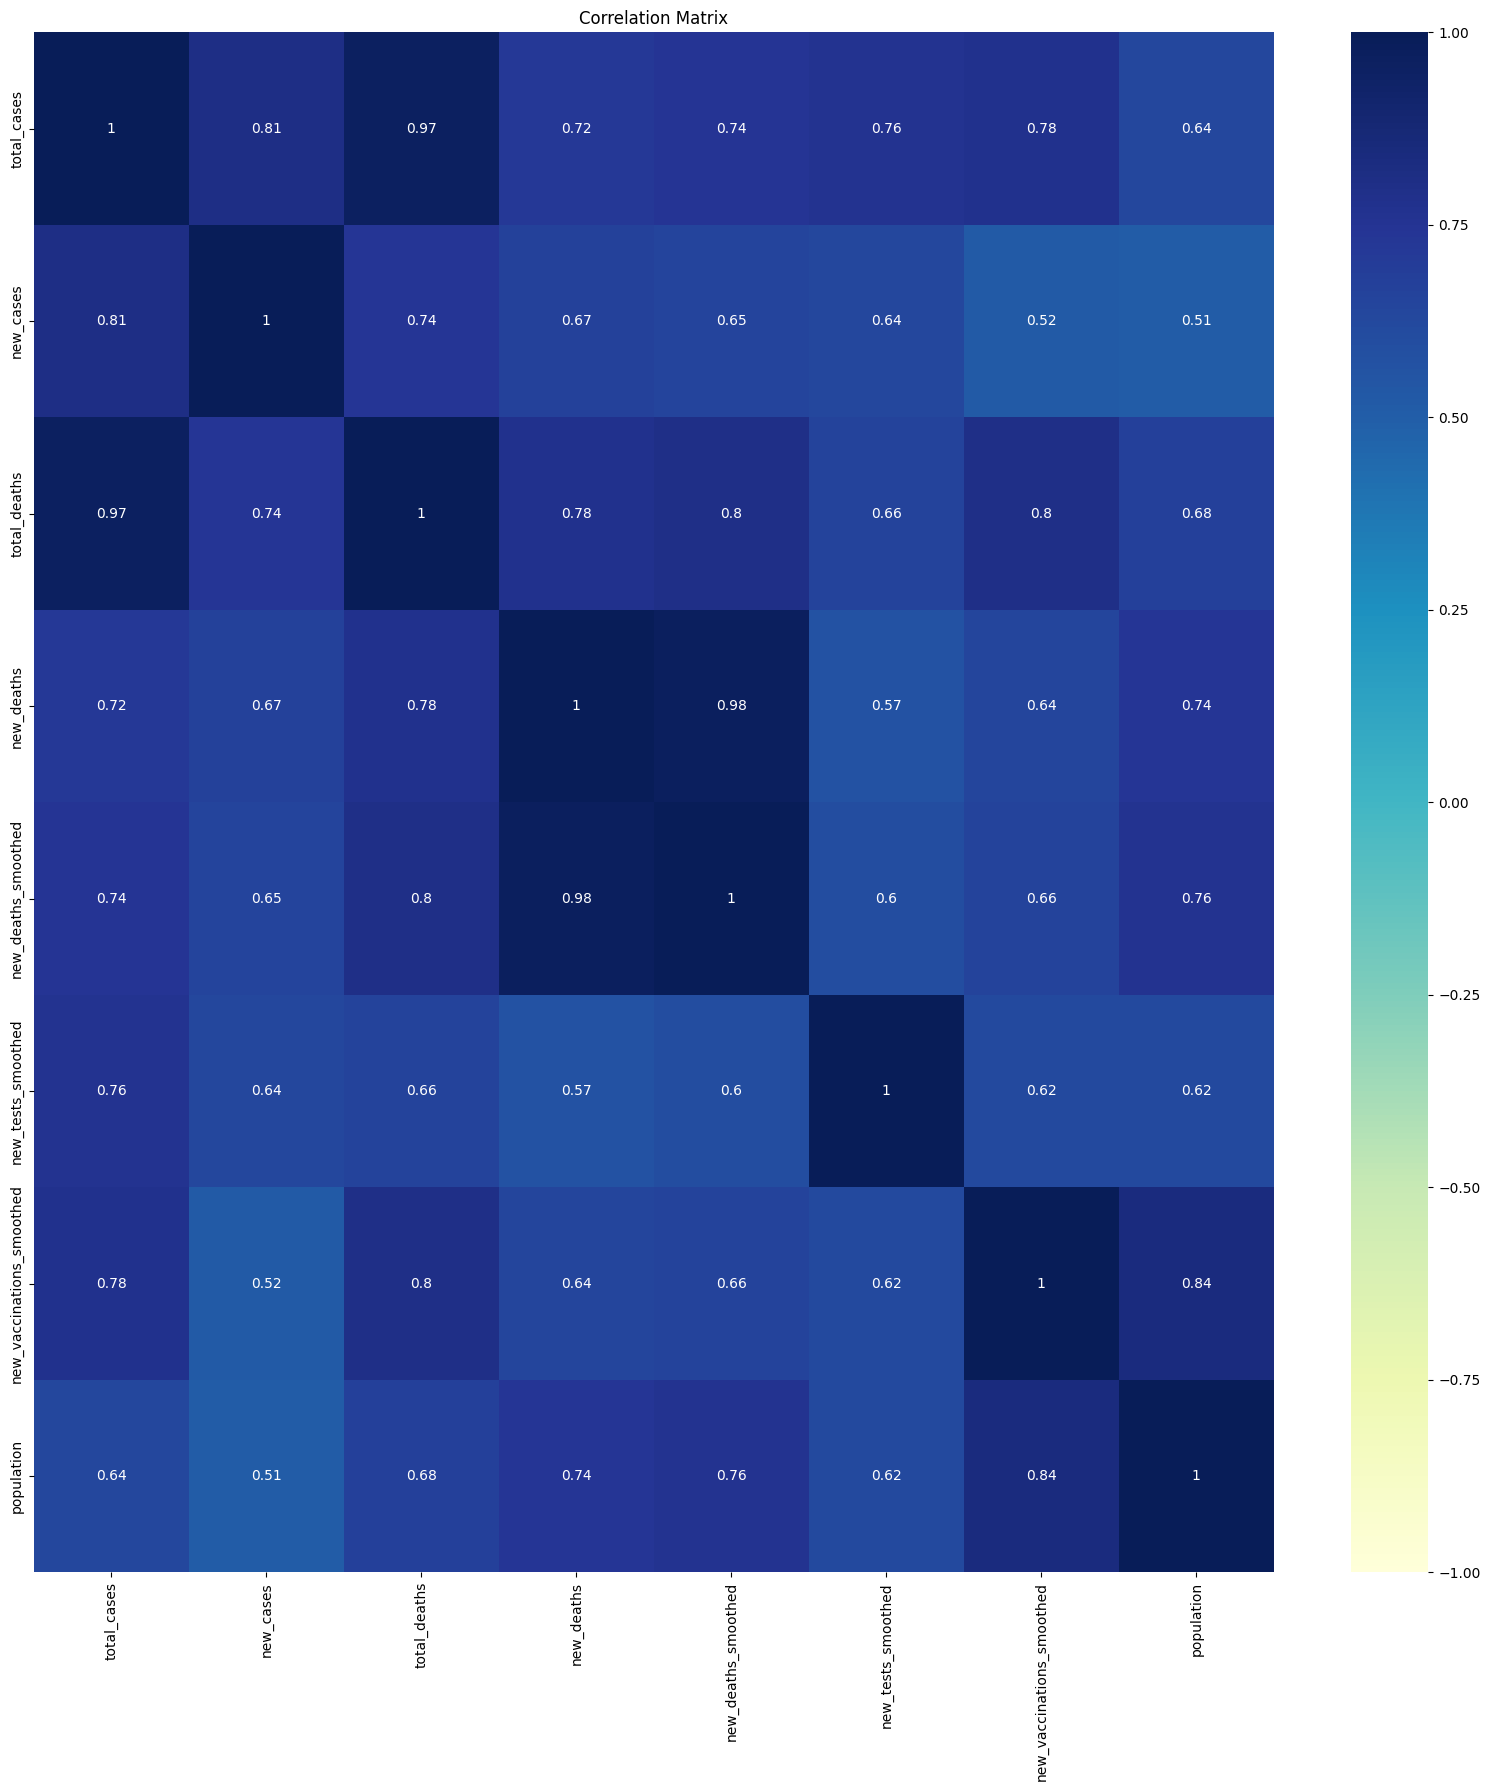

In [30]:
#Matriz de correlacion
corr_matrix = df_numeric.corr()
target_corr_df = pd.DataFrame(corr_matrix["new_cases"].sort_values(ascending=False))
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu").set_title('Correlation Matrix')
plt.show()

### Rellenar con la media los valores faltantes en las columnas numericas.

In [31]:
#Datos faltantes en columnas numericas
infc=faltap(df_numeric)
infc

,Total,Percent
new_vaccinations_smoothed,81334,49.857478
new_tests_smoothed,79466,48.712400
new_deaths_smoothed,19864,12.176568
total_deaths,17826,10.927280
new_deaths,17769,10.892339
population,758,0.464652
total_cases,7,0.004291
new_cases,0,0.000000


In [32]:
#Reemplazar datos faltantes en columnas numericas con la media
df_numeric["new_vaccinations_smoothed"].fillna(int(df_numeric.new_vaccinations_smoothed.mean()), inplace=True)
df_numeric["new_tests_smoothed"].fillna(int(df_numeric.new_tests_smoothed.mean()), inplace=True)
df_numeric["new_deaths_smoothed"].fillna(int(df_numeric.new_deaths_smoothed.mean()), inplace=True)
df_numeric["total_deaths"].fillna(int(df_numeric.total_deaths.mean()), inplace=True)
df_numeric["new_deaths"].fillna(int(df_numeric.new_deaths.mean()), inplace=True)
df_numeric["total_cases"].fillna(int(df_numeric.total_cases.mean()), inplace=True)
df_numeric["population"].fillna(int(df_numeric.population.mean()), inplace=True)
#df_numeric["new_cases"].fillna(int(df_numeric.new_cases.mean()), inplace=True)

In [33]:
infc=faltap(df_numeric)
infc

,Total,Percent
total_cases,0,0.0
new_cases,0,0.0
total_deaths,0,0.0
new_deaths,0,0.0
new_deaths_smoothed,0,0.0
new_tests_smoothed,0,0.0
new_vaccinations_smoothed,0,0.0
population,0,0.0


In [34]:
df_numeric

,total_cases,new_cases,total_deaths,new_deaths,new_deaths_smoothed,new_tests_smoothed,new_vaccinations_smoothed,population
Id,,,,,,,,
0,5.0,5.0,57700.0,171.0,172.000,61226.0,539550.0,39835428.0
1,5.0,0.0,57700.0,171.0,172.000,61226.0,539550.0,39835428.0
2,5.0,0.0,57700.0,171.0,172.000,61226.0,539550.0,39835428.0
3,5.0,0.0,57700.0,171.0,172.000,61226.0,539550.0,39835428.0
4,5.0,0.0,57700.0,171.0,172.000,61226.0,539550.0,39835428.0
...,...,...,...,...,...,...,...,...
166321,236871.0,491.0,5395.0,0.0,1.000,4063.0,9291.0,15092171.0
166322,237503.0,632.0,5396.0,1.0,1.143,3827.0,9061.0,15092171.0
166323,237503.0,0.0,5396.0,0.0,0.857,3940.0,8903.0,15092171.0


In [35]:
#Correlacion
corr_matrix1 = df_numeric.corr()
target_corr_df = pd.DataFrame(corr_matrix1["new_cases"].sort_values(ascending=False))
target_corr_df

,new_cases
new_cases,1.000000
total_cases,0.808562
total_deaths,0.735689
new_deaths,0.666613
new_deaths_smoothed,0.652597
population,0.513512
new_vaccinations_smoothed,0.504490
new_tests_smoothed,0.129600


Visualizar distribucion variable objetivo

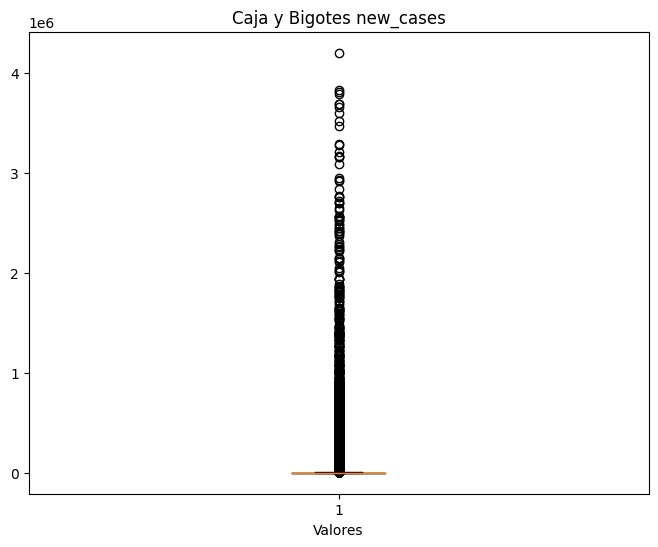

In [36]:
data_column = d['new_cases']

# Crea un gráfico de caja y bigotes para variable objetivo new_cases
plt.figure(figsize=(8, 6))
plt.boxplot(data_column, vert=True)  # vert=False para un gráfico horizontal
plt.title('Caja y Bigotes new_cases')
plt.xlabel('Valores')
plt.show()

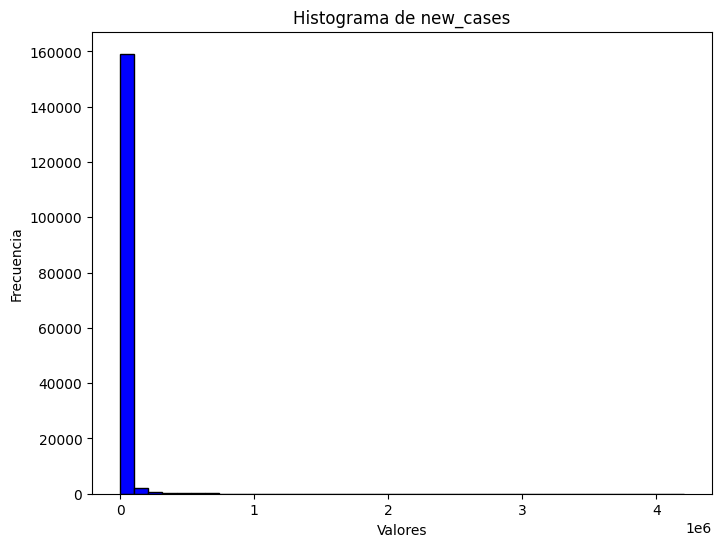

In [37]:
plt.figure(figsize=(8, 6))
plt.hist(data_column, bins=40, color='blue', edgecolor='black')
plt.title('Histograma de new_cases')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

# Transformacion logaritmica new_cases

In [38]:
from scipy import stats

In [39]:
#Ajustar los valores en la columna de datos new_cases (data_column)
minimo=np.min(data_column)
print(minimo)
a_sumar=np.ones(len(np.array(data_column)))*0.1
a_sumar
data_column1=data_column+a_sumar

0.0


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


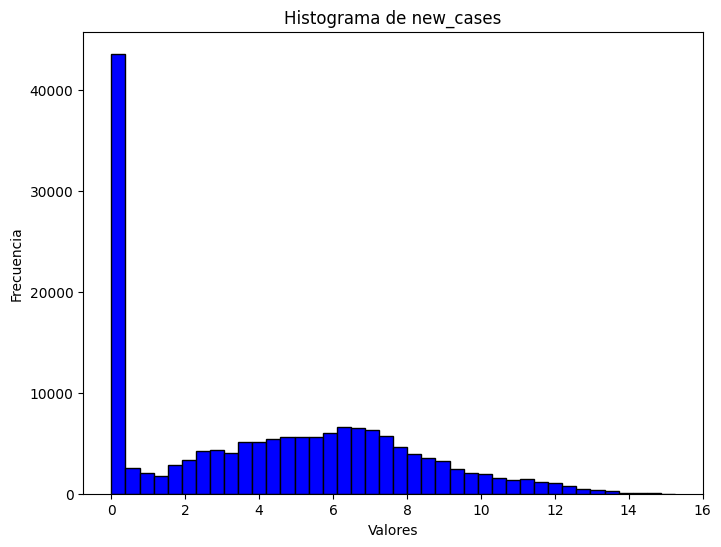

In [40]:
#Transformacion Box-Cox, transformacion logaritmica y visualizacion histograma

#Datos3, lambda_value = stats.boxcox(data_column1) #Box-cox
Datos3 = np.log(data_column) #Logaritmica
Datos3.replace([np.inf, -np.inf], 0, inplace=True)
plt.figure(figsize=(8, 6))
plt.hist(Datos3, bins=40, color='blue', edgecolor='black')
plt.title('Histograma de new_cases')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

# Codificacion columnas no numericas

In [51]:
#Agregamos las columnas no numericas al df resultante del proceso anterior.

h=['continent', 'location', 'tests_units', 'date']

for j in h:
  df_numeric[j]=d[j]

In [52]:
df_total=df_numeric

In [53]:
df_total

,total_cases,new_cases,total_deaths,new_deaths,new_deaths_smoothed,new_tests_smoothed,new_vaccinations_smoothed,population,continent,location,tests_units,date
Id,,,,,,,,,,,,
0,5.0,5.0,57700.0,171.0,172.000,61226.0,539550.0,39835428.0,Asia,Afghanistan,tests performed,2020-02-24
1,5.0,0.0,57700.0,171.0,172.000,61226.0,539550.0,39835428.0,Asia,Afghanistan,tests performed,2020-02-25
2,5.0,0.0,57700.0,171.0,172.000,61226.0,539550.0,39835428.0,Asia,Afghanistan,tests performed,2020-02-26
3,5.0,0.0,57700.0,171.0,172.000,61226.0,539550.0,39835428.0,Asia,Afghanistan,tests performed,2020-02-27
4,5.0,0.0,57700.0,171.0,172.000,61226.0,539550.0,39835428.0,Asia,Afghanistan,tests performed,2020-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...
166321,236871.0,491.0,5395.0,0.0,1.000,4063.0,9291.0,15092171.0,Africa,Zimbabwe,tests performed,2022-03-01
166322,237503.0,632.0,5396.0,1.0,1.143,3827.0,9061.0,15092171.0,Africa,Zimbabwe,tests performed,2022-03-02
166323,237503.0,0.0,5396.0,0.0,0.857,3940.0,8903.0,15092171.0,Africa,Zimbabwe,tests performed,2022-03-03


In [54]:
#Codificacion 'continent', 'location', 'tests_units'
var_categoricas = ['continent', 'location', 'tests_units']
encoder = ps.LabelEncoder()

In [55]:
for i in var_categoricas:

    df_total[i] = encoder.fit_transform(df_total[i])

df_total.continent=df_total.continent.astype(int)
df_total["location"]=df_total["location"].astype(int)
df_total.tests_units=df_total.tests_units.astype(int)

df_total=df_total.reset_index(drop=True)
print (df_total.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163133 entries, 0 to 163132
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   total_cases                163133 non-null  float64
 1   new_cases                  163133 non-null  float64
 2   total_deaths               163133 non-null  float64
 3   new_deaths                 163133 non-null  float64
 4   new_deaths_smoothed        163133 non-null  float64
 5   new_tests_smoothed         163133 non-null  float64
 6   new_vaccinations_smoothed  163133 non-null  float64
 7   population                 163133 non-null  float64
 8   continent                  163133 non-null  int64  
 9   location                   163133 non-null  int64  
 10  tests_units                163133 non-null  int64  
 11  date                       163133 non-null  object 
dtypes: float64(8), int64(3), object(1)
memory usage: 14.9+ MB
None


In [57]:
#Convertir date a tipo de dato fecha
df_total['date'] = pd.to_datetime(df_total['date'])

In [58]:
#Codificacion 'date'

#Extraer componentes de la fecha, como el día, mes, año, día de la semana
df_total['year'] = df_total['date'].dt.year
df_total['month'] = df_total['date'].dt.month
df_total['day'] = df_total['date'].dt.day
df_total['weekday'] = df_total['date'].dt.weekday
# Eliminar la columna original 'date'
df_total.drop('date', axis=1, inplace=True)

In [59]:
df_total

,total_cases,new_cases,total_deaths,new_deaths,new_deaths_smoothed,new_tests_smoothed,new_vaccinations_smoothed,population,continent,location,tests_units,year,month,day,weekday
0,5.0,5.0,57700.0,171.0,172.000,61226.0,539550.0,39835428.0,1,0,2,2020,2,24,0
1,5.0,0.0,57700.0,171.0,172.000,61226.0,539550.0,39835428.0,1,0,2,2020,2,25,1
2,5.0,0.0,57700.0,171.0,172.000,61226.0,539550.0,39835428.0,1,0,2,2020,2,26,2
3,5.0,0.0,57700.0,171.0,172.000,61226.0,539550.0,39835428.0,1,0,2,2020,2,27,3
4,5.0,0.0,57700.0,171.0,172.000,61226.0,539550.0,39835428.0,1,0,2,2020,2,28,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163128,236871.0,491.0,5395.0,0.0,1.000,4063.0,9291.0,15092171.0,0,227,2,2022,3,1,1
163129,237503.0,632.0,5396.0,1.0,1.143,3827.0,9061.0,15092171.0,0,227,2,2022,3,2,2
163130,237503.0,0.0,5396.0,0.0,0.857,3940.0,8903.0,15092171.0,0,227,2,2022,3,3,3
163131,238739.0,1236.0,5397.0,1.0,0.714,4053.0,8603.0,15092171.0,0,227,2,2022,3,4,4


In [60]:
df_total.to_csv('DB.csv', index=False)